# Práctica No. 10: Aplicando K-Means

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

paises = pd.read_csv('infoPaises.csv', index_col = 0)
paises

,Income Group,CO2 emissions (metric tons per capita),GDP per capita (current US$),"Life expectancy at birth, total (years)"
Short Name,,,,
Afghanistan,Low income,0.223479,516.866797,62.575
Angola,Lower middle income,0.592743,1502.950754,62.261
Albania,Upper middle income,1.544550,5343.037704,76.989
United Arab Emirates,High income,20.252272,37629.174168,78.946
Argentina,Upper middle income,3.405618,8496.428157,75.892
...,...,...,...,...
Samoa,Lower middle income,0.960782,4042.722715,72.768
Yemen,Low income,0.308515,583.875663,64.650
South Africa,Upper middle income,6.687563,5741.641249,65.252


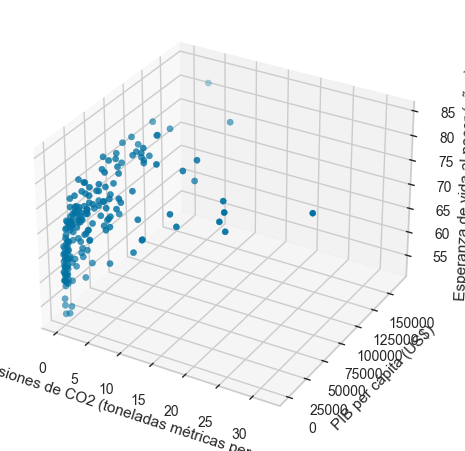

In [55]:
co2 = paises['CO2 emissions (metric tons per capita)']
gdp = paises['GDP per capita (current US$)']
es = paises['Life expectancy at birth, total (years)']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(co2, gdp, es)

ax.set_xlabel('Emisiones de CO2 (toneladas métricas per cápita)')
ax.set_ylabel('PIB per cápita (US$)')
ax.set_zlabel('Esperanza de vida al nacer (años)')

plt.show()

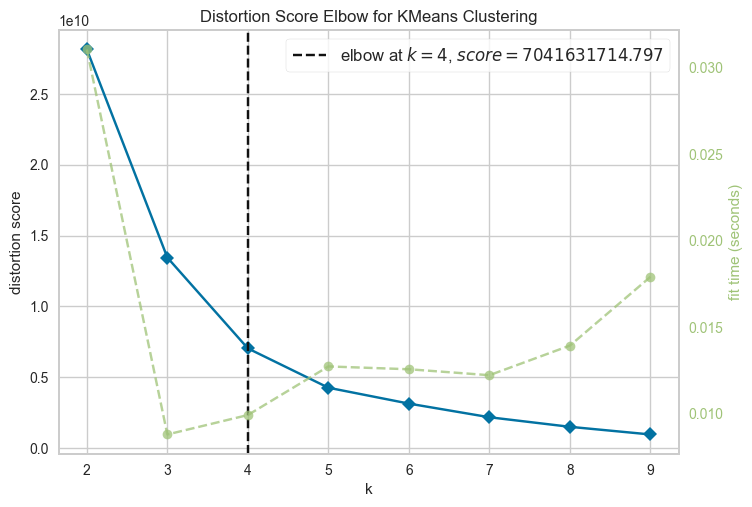

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

X = paises[['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)', 'Life expectancy at birth, total (years)']].values

model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()

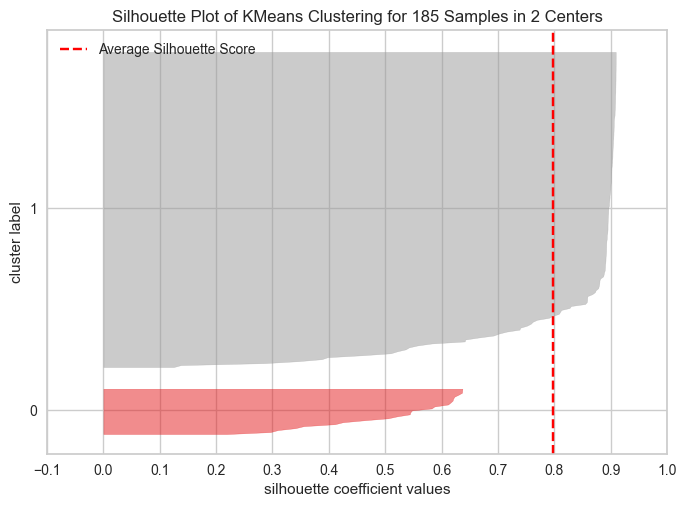

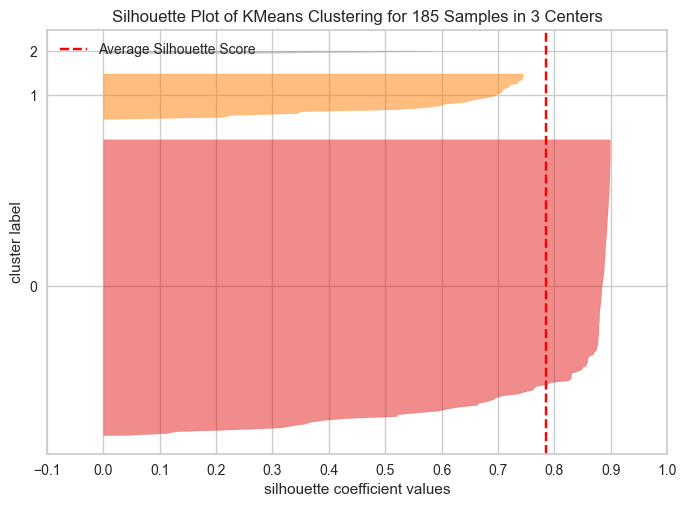

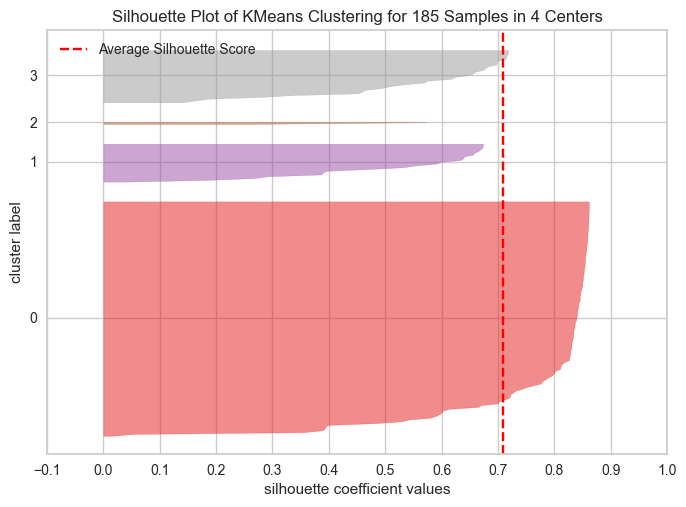

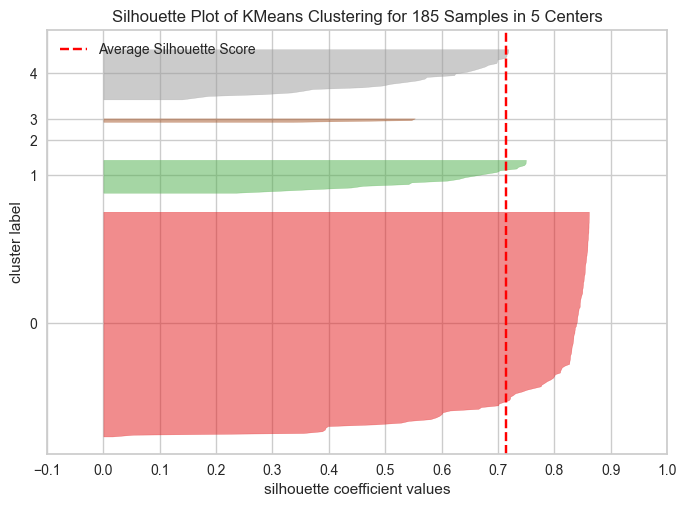

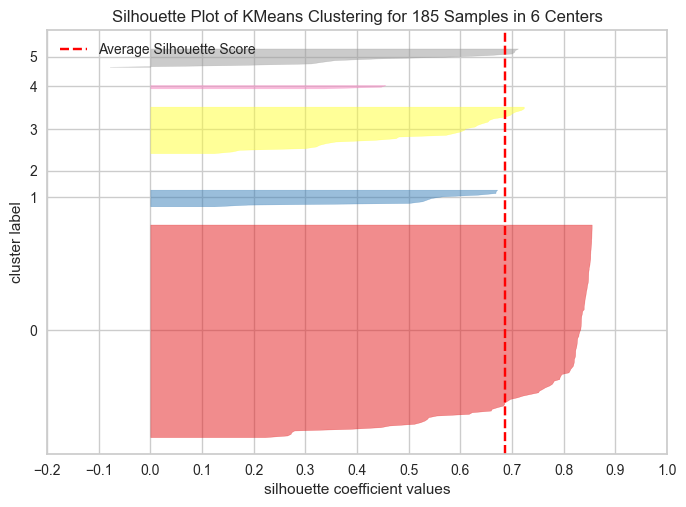

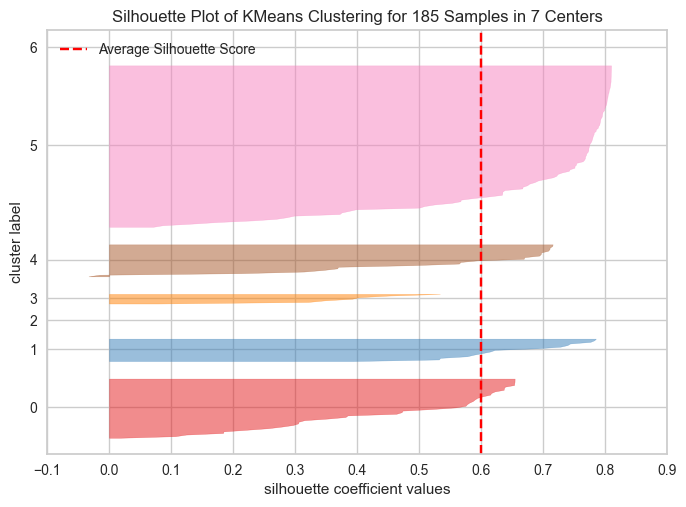

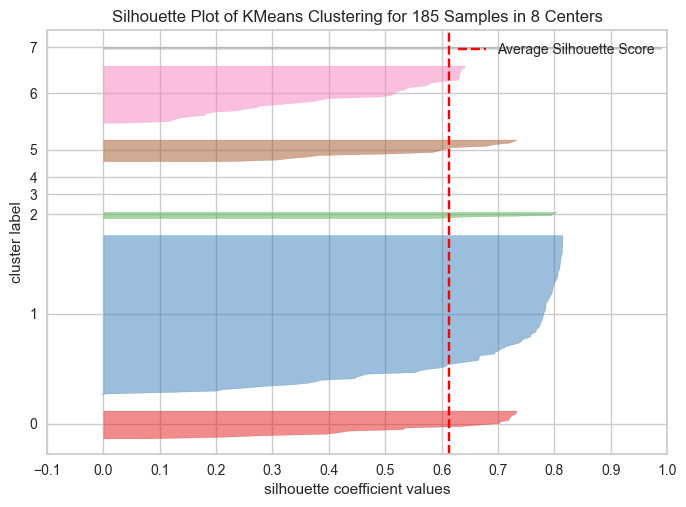

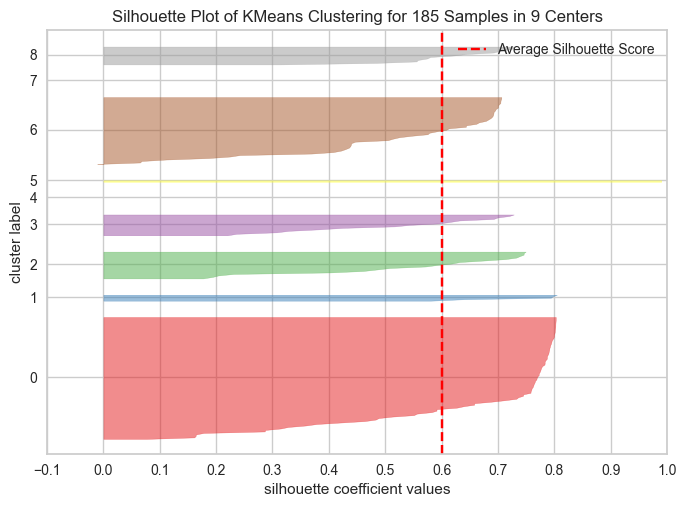

In [58]:
for k in range(2, 10):
    model = KMeans(n_clusters=k, n_init=10)
    visualizer = SilhouetteVisualizer(model)

    visualizer.fit(X)
    visualizer.show()


In [29]:
paises.describe(include='all')


,Income Group,CO2 emissions (metric tons per capita),GDP per capita (current US$),"Life expectancy at birth, total (years)"
count,185,185.000000,185.000000,185.000000
unique,4,NaN,NaN,NaN
top,High income,NaN,NaN,NaN
freq,57,NaN,NaN,NaN
mean,NaN,3.809986,13965.138352,71.704014
std,NaN,4.648183,21862.666488,7.402840
min,NaN,0.032585,216.827417,52.777000
25%,NaN,0.649801,1913.219721,65.787000
50%,NaN,2.404684,5343.037704,72.173000
75%,NaN,4.848663,15816.820402,76.989000


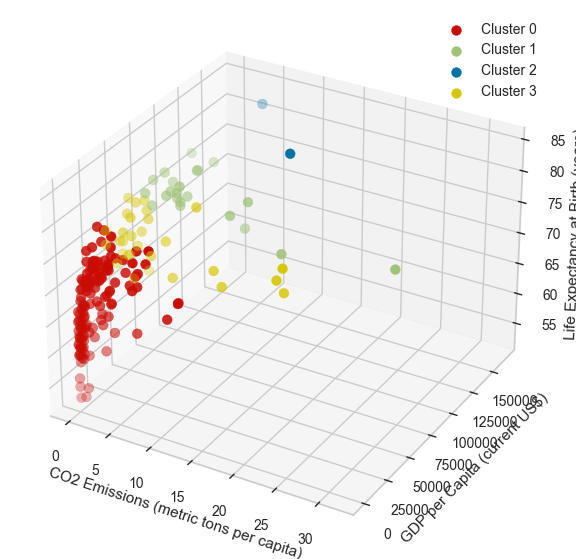

In [64]:
columnas = ['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)', 'Life expectancy at birth, total (years)']
X = paises[columnas]

kmeans = KMeans(n_clusters= 4, n_init=10, random_state=42)
kmeans.fit(X)

paises['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']

for i in range(4):
    points = X[paises['Cluster'] == i].values
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=50, c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('CO2 Emissions (metric tons per capita)')
ax.set_ylabel('GDP per Capita (current US$)')
ax.set_zlabel('Life Expectancy at Birth (years)')


ax.legend()
plt.show()

In [62]:
paises

,Income Group,CO2 emissions (metric tons per capita),GDP per capita (current US$),"Life expectancy at birth, total (years)",Cluster
Short Name,,,,,
Afghanistan,Low income,0.223479,516.866797,62.575,0
Angola,Lower middle income,0.592743,1502.950754,62.261,0
Albania,Upper middle income,1.544550,5343.037704,76.989,0
United Arab Emirates,High income,20.252272,37629.174168,78.946,1
Argentina,Upper middle income,3.405618,8496.428157,75.892,0
...,...,...,...,...,...
Samoa,Lower middle income,0.960782,4042.722715,72.768,0
Yemen,Low income,0.308515,583.875663,64.650,0
South Africa,Upper middle income,6.687563,5741.641249,65.252,0


/tmp/ipykernel_34266/662097938.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


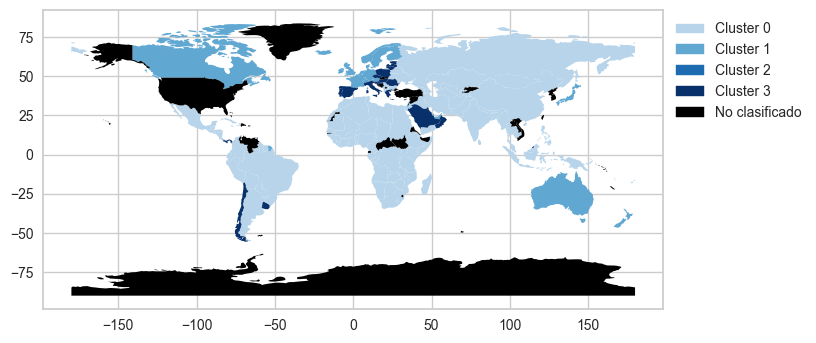

In [63]:
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.set_index('name').join(paises, how="left")

num_clusters = 4
colors = plt.cm.Blues(np.linspace(0.3, 1, num_clusters))
cluster_colors = {i: colors[i] for i in range(num_clusters)}

fig, ax = plt.subplots(1, 1)
for cluster, color in cluster_colors.items():
    merged[merged['Cluster'] == cluster].plot(color=color, ax=ax)

# Colorea de negro los países que no están en el DataFrame
merged[pd.isna(merged['Cluster'])].plot(color='black', ax=ax)

legend_labels = [mpatches.Patch(color=color, label=f'Cluster {cluster}') for cluster, color in cluster_colors.items()]
legend_labels.append(mpatches.Patch(color='black', label='No clasificado'))

plt.legend(handles=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
